In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('normalized_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Columns: 686 entries, Title to Efficiency in %
dtypes: float64(684), object(2)
memory usage: 166.3+ KB


In [4]:
# Replace NaN values with the median for numeric columns only
ncol = df.select_dtypes(include=['float64','int64']).columns
df[ncol] = df[ncol].fillna(df[ncol].median())
df.head(15)

,Title,r_j_SCF_Energy_Hartree,r_j_Gas_Phase_Energy_Hartree,r_j_One_Electron_Energy_Hartree,r_j_Two-electron_Energy_Hartree,r_j_Total_Electronic_Energy_Hartree,r_j_Nuclear_Repulsion_Energy_Hartree,r_j_Alpha_HOMO_Energy_Hartree,r_j_Beta_HOMO_Energy_Hartree,r_j_Alpha_LUMO_Energy_Hartree,...,r_qp_PSA,i_qp_#NandO,i_qp_RuleOfFive,i_qp_RuleOfThree,i_qp_#ringatoms,i_qp_#in34,i_qp_#in56,i_qp_#noncon,i_qp_#nonHatm,Efficiency in %
0,H02,0.721267,0.721267,0.609212,0.421452,0.628942,0.424676,0.673355,0.673355,0.639610,...,0.636821,0.4,0.0,0.0,0.35,0.0,0.35,0.0,0.458333,0.700375
1,H04,0.953817,0.953817,0.921560,0.086407,0.926687,0.093915,0.373615,0.373615,0.378246,...,0.828640,0.4,0.0,1.0,0.05,0.0,0.05,0.0,0.125000,0.928839
2,H06,0.161868,0.161868,0.426689,0.507842,0.384567,0.281201,0.644812,0.644812,0.623672,...,0.276780,0.2,0.0,0.0,0.05,0.0,0.05,0.0,0.208333,0.895131
3,H08,0.149969,0.149969,0.417338,0.516224,0.374593,0.287654,0.698140,0.698140,0.621555,...,0.257465,0.2,0.0,0.0,0.05,0.0,0.05,0.0,0.250000,0.913858
4,H09,0.000000,0.000000,0.000000,1.000000,0.000000,0.864346,0.513441,0.513441,0.426282,...,0.377493,0.4,1.0,1.0,0.80,0.0,0.80,0.0,0.791667,0.928839
5,H11,0.912819,0.912819,0.839758,0.178322,0.851391,0.197614,0.368653,0.368653,0.397778,...,0.514300,0.4,0.0,0.0,0.30,0.0,0.30,1.0,0.250000,0.728464
6,H12,0.918822,0.918822,0.846267,0.171549,0.857730,0.191758,0.372627,0.372627,0.397139,...,0.584111,0.4,0.0,0.0,0.30,0.0,0.30,1.0,0.250000,0.898502
7,H13,0.876389,0.876389,0.749412,0.282395,0.769877,0.318833,0.439830,0.439830,0.451700,...,0.315455,0.4,0.0,0.0,0.05,0.0,0.05,0.0,0.375000,0.805243
8,H14,0.882795,0.882795,0.776981,0.251672,0.795417,0.275213,0.763224,0.763224,0.620012,...,0.277910,0.2,0.0,0.0,0.35,0.0,0.35,0.0,0.375000,0.823970
9,H15,0.929950,0.929950,0.870823,0.141681,0.878869,0.162215,0.135779,0.135779,0.194348,...,0.800202,0.4,0.0,0.0,0.05,0.0,0.05,0.0,0.208333,1.000000


In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

In [6]:
correlation_with_target = numerical_columns.corr()['Efficiency in %'].sort_values(ascending=False)

# Display the top 10 features with the highest correlation with the target
correlation_with_target.head(10)

Efficiency in %                                    1.000000
r_desc_Kier_flexibility                            0.475905
r_desc_3-path_Kier_alpha-modified_shape_index      0.462779
r_desc_Radial_centric                              0.461865
r_desc_Mean_topological_charge_index_of_order_7    0.445212
r_desc_2-path_Kier_alpha-modified_shape_index      0.408928
r_desc_Petitjean_2D_shape                          0.407788
i_canvas_RB                                        0.390326
r_desc_ALOGP5                                      0.370485
r_desc_Average_eccentricity                        0.356453
Name: Efficiency in %, dtype: float64

In [7]:
top_10_features = correlation_with_target.head(10).index

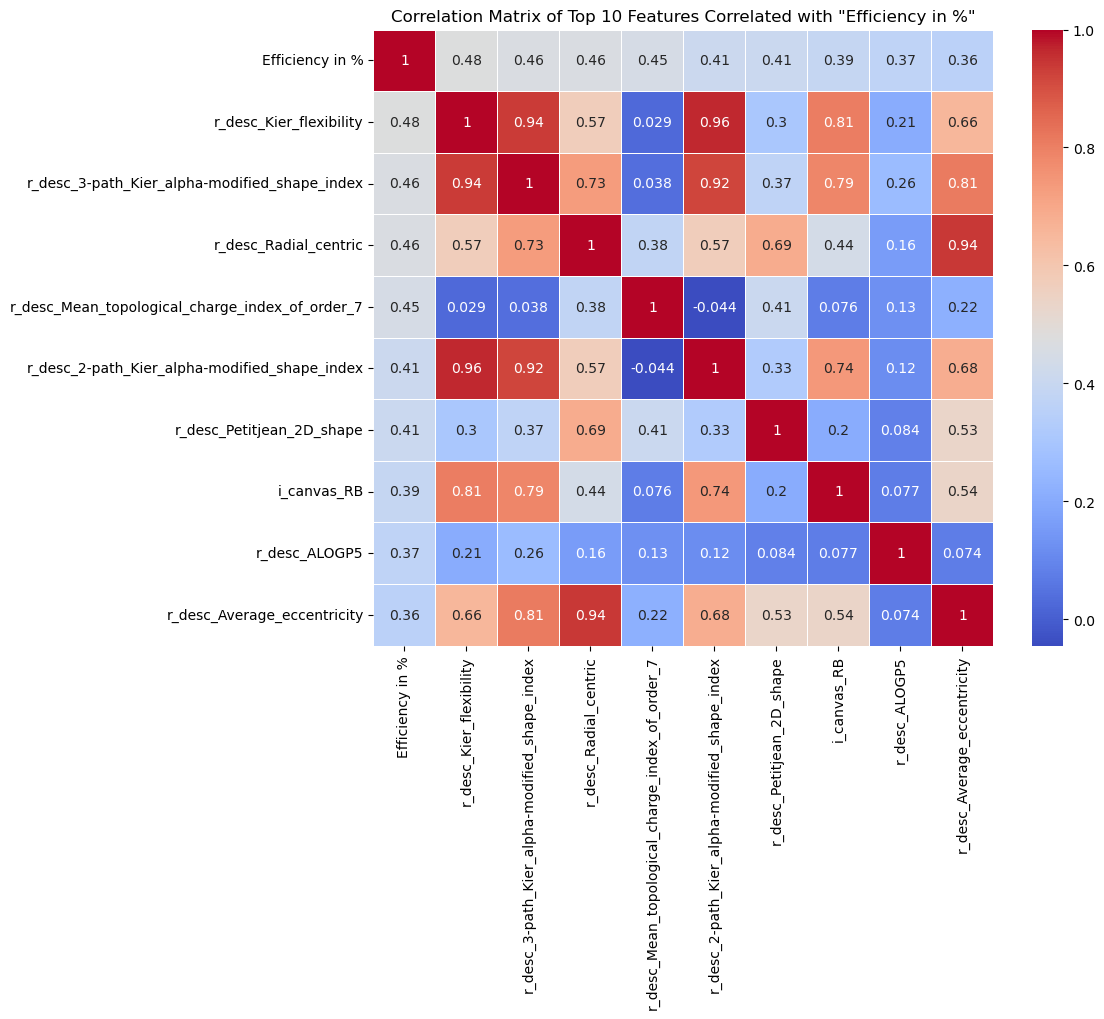

In [8]:
# Filter the correlation matrix for the top 10 correlated features
top_10_corr_matrix = correlation_matrix.loc[top_10_features, top_10_features]

# Plot the correlation matrix of the top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top 10 Features Correlated with "Efficiency in %"')
plt.savefig('top_10_correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

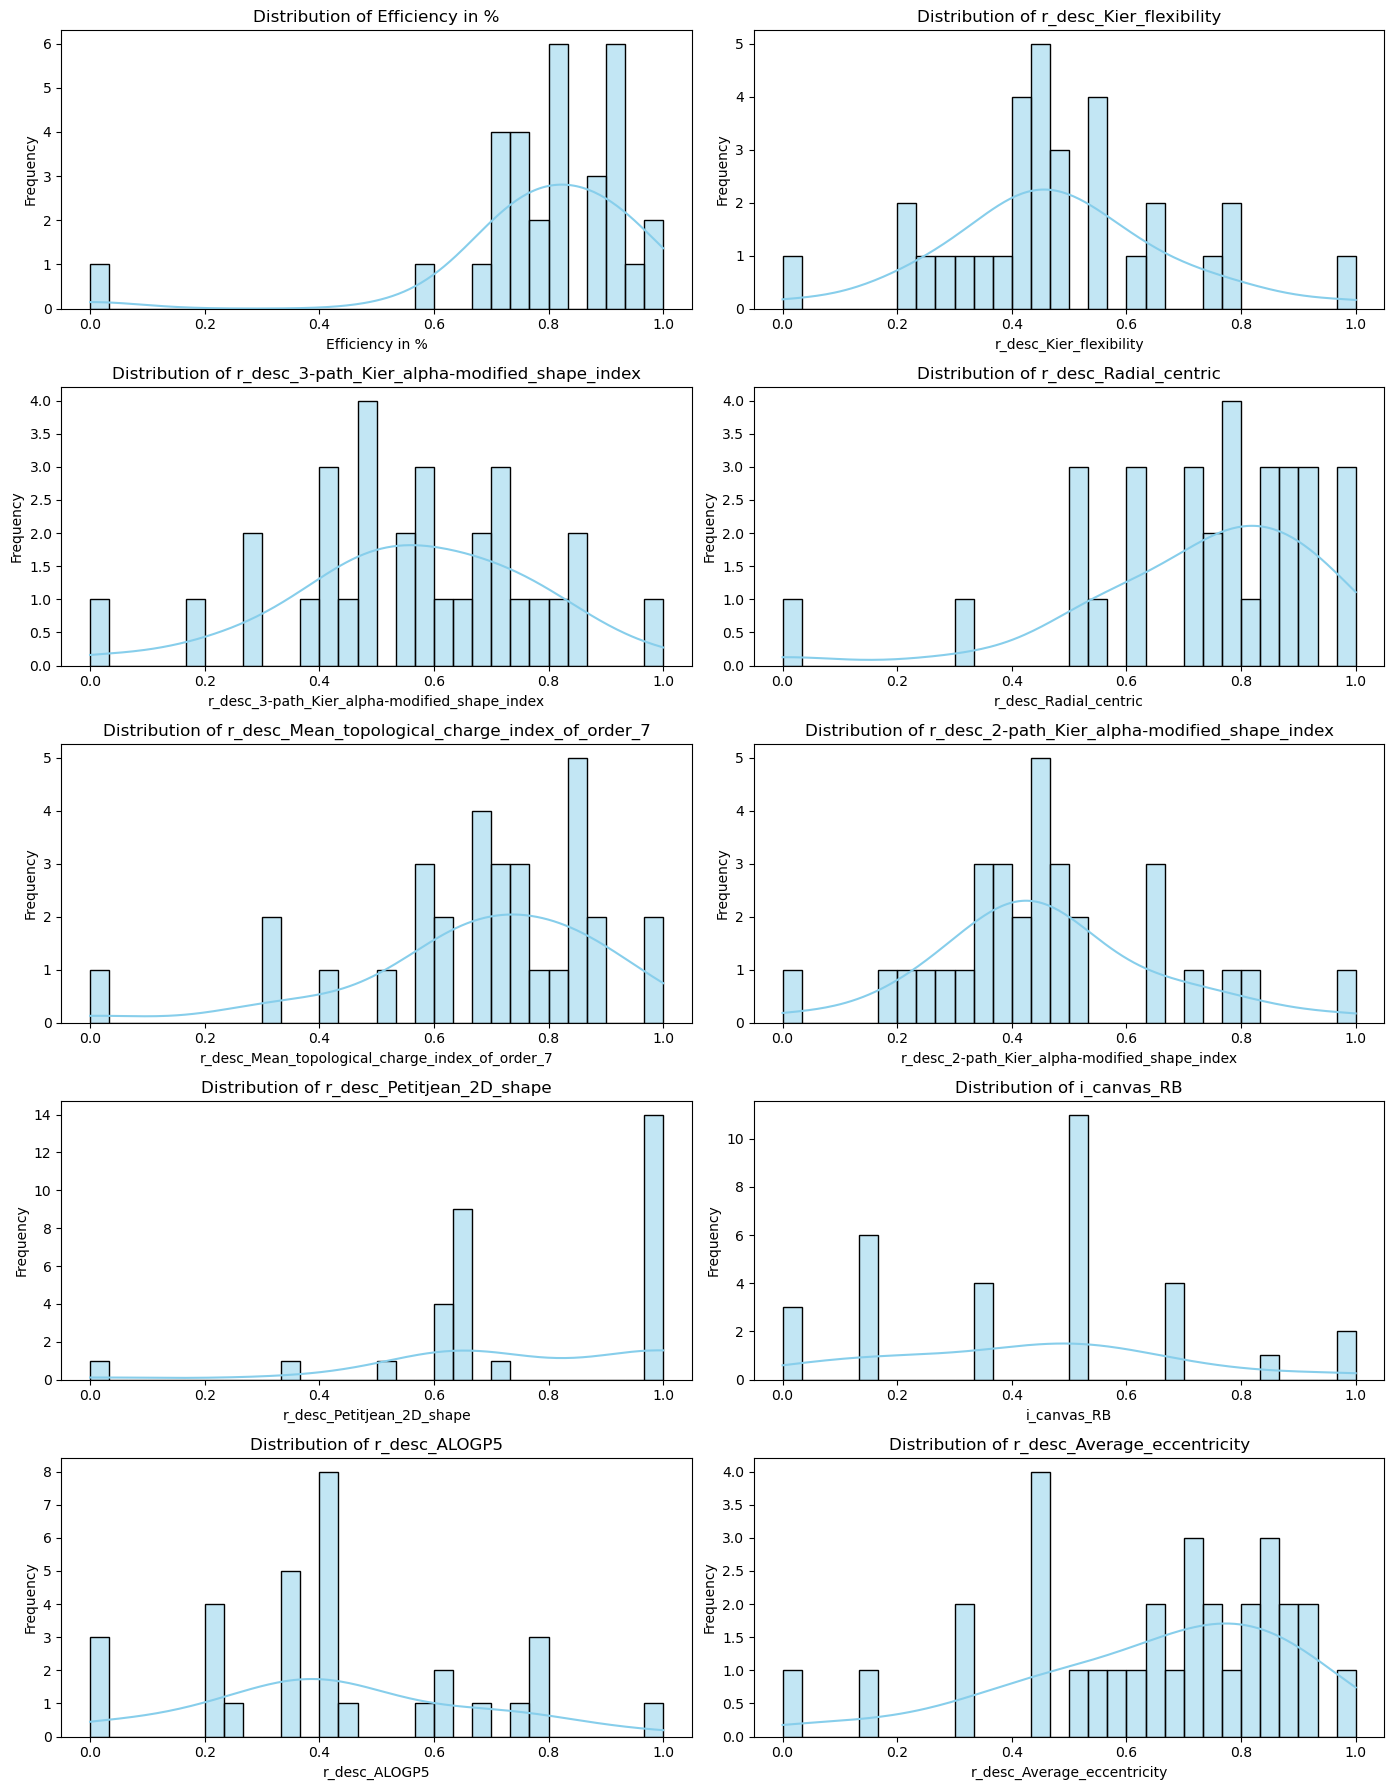

In [115]:
# Assuming 'correlation_with_target' contains the top 10 features correlated with the target
top_10_features = correlation_with_target.head(10).index

# Plotting the distribution of the top 10 features
plt.figure(figsize=(14, 18))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)  # Create subplots with 5 rows and 2 columns
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
# Create df_sqrt for transformed data
df_sqrt = df.copy()

In [15]:
# Apply square root transformation to skewed features
for feature in top_10_features:
    df_sqrt[f'sqrt_{feature}'] = np.sqrt(df[feature])

In [16]:
df_sqrt['descriptions'] = ""

In [18]:
for index, row in df_sqrt.iterrows():
    description = f"""
    Molecule {index + 1}:
    This molecule demonstrates a corrosion inhibition efficiency of {row['sqrt_Efficiency in %']:.10f} percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments 
    The molecule exhibits a Kier flexibility value of {row['sqrt_r_desc_Kier_flexibility']:.10f} suggesting 
    a relatively adaptable structure that could affect its ability to fit into complex molecular configurations

    The 3-path Kier alpha-modified shape index is measured at {row['sqrt_r_desc_3-path_Kier_alpha-modified_shape_index']:.10f} 
    reflecting the structural modifications made to enhance its stability. Additionally it has a radial centric 
    value of {row['sqrt_r_desc_Radial_centric']:.10f} which measures the centrality of its atomic distribution 
    often linked to molecule symmetry and its interactions in polar environments

    This molecule features a mean topological charge index of {row['sqrt_r_desc_Mean_topological_charge_index_of_order_7']:.10f} 
    for the 7th order indicating how its charge is distributed over its surface potentially influencing its 
    electron-withdrawing or donating properties during reactions

    Furthermore the 2-path Kier alpha-modified shape index is {row['sqrt_r_desc_2-path_Kier_alpha-modified_shape_index']:.10f} 
    providing additional insight into the complexity of its bond structure The Petitjean 2D shape value of 
    {row['sqrt_r_desc_Petitjean_2D_shape']:.10f} indicates its geometric compactness influencing the molecule’s 
    behavior in solvent environments

    This molecule also contains {row['sqrt_i_canvas_RB']:.10f} rotatable bonds signifying its degree of flexibility 
    for conformational changes which may be crucial in determining its interaction with surfaces or biological targets

    The ALOGP5 value of {row['sqrt_r_desc_ALOGP5']:.10f} suggests that this molecule has a certain level of lipophilicity 
    influencing its solubility in organic solvents and membrane permeability which could be important for industrial 
    applications or drug formulation

    Finally the average eccentricity of {row['sqrt_r_desc_Average_eccentricity']:.10f} provides insights into its atomic 
    distribution with potential implications for its reactivity diffusion and other dynamic properties """
        
    df_sqrt.at[index, 'descriptions'] = description    
    print(description)


    Molecule 1:
    This molecule demonstrates a corrosion inhibition efficiency of 0.8368838222 percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments 
    The molecule exhibits a Kier flexibility value of 0.6986506904 suggesting 
    a relatively adaptable structure that could affect its ability to fit into complex molecular configurations

    The 3-path Kier alpha-modified shape index is measured at 0.7048173397 
    reflecting the structural modifications made to enhance its stability. Additionally it has a radial centric 
    value of 0.7265105128 which measures the centrality of its atomic distribution 
    often linked to molecule symmetry and its interactions in polar environments

    This molecule features a mean topological charge index of 1.0000000000 
    for the 7th order indicating how its charge is distributed over its surface potentially influencing its 
    electron-withdrawing or donating properties during reac

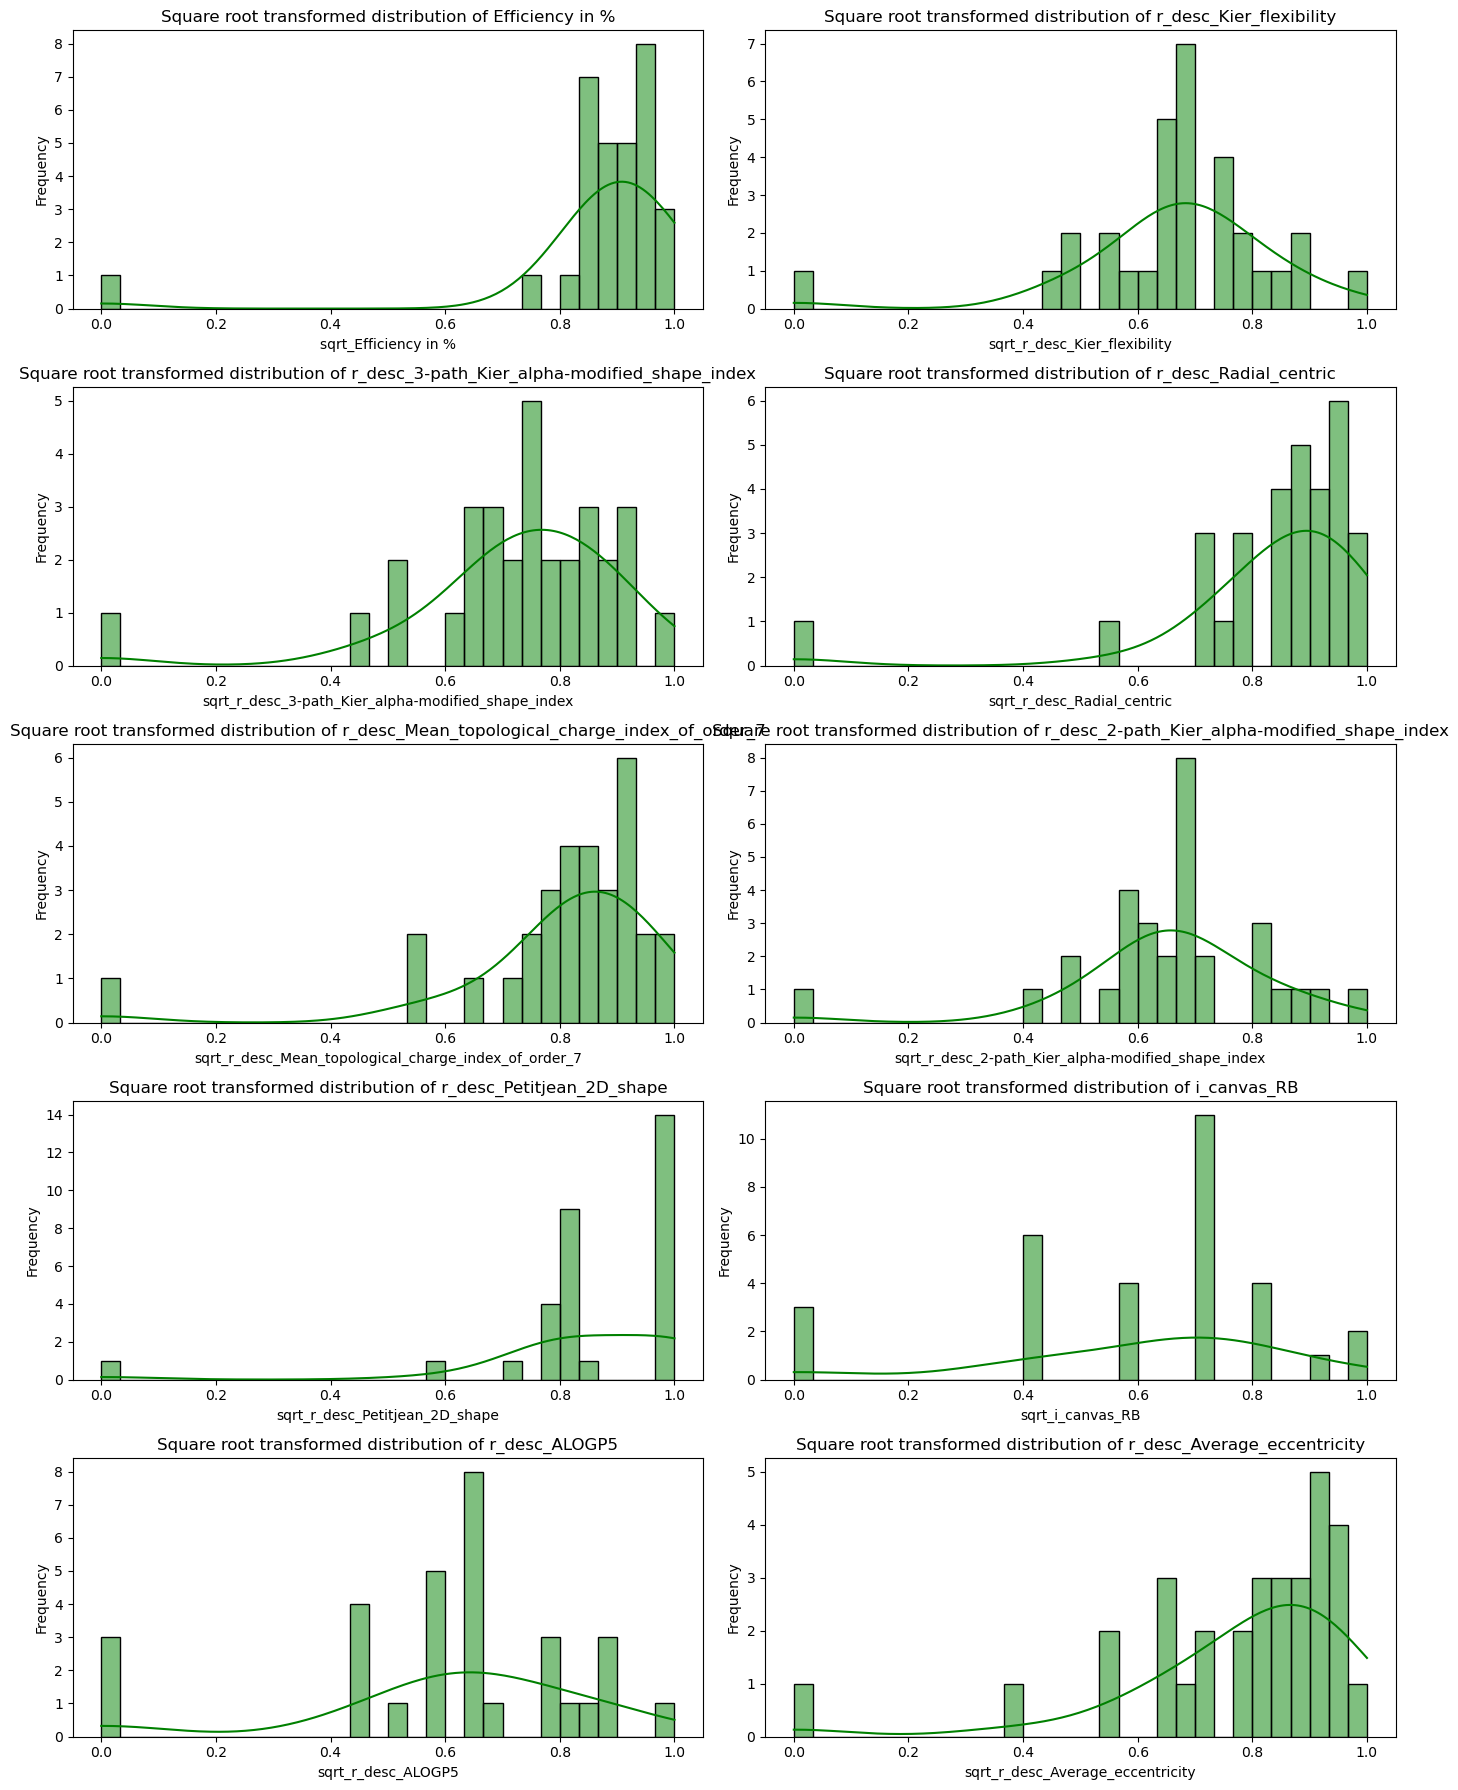

In [116]:
# Visualize the transformed data
plt.figure(figsize=(14, 18))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_sqrt[f'sqrt_{feature}'], kde=True, bins=30, color='green')
    plt.title(f'Square root transformed distribution of {feature}')
    plt.xlabel(f'sqrt_{feature}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [117]:
df_sqrt.to_excel('Sqrt_Molecules.xlsx', index=False)

In [2]:
df = pd.read_excel('Sqrt_Molecules.xlsx')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
from datasets import Dataset
from transformers import Trainer, TrainingArguments

In [4]:
train_texts, test_texts = train_test_split(df['descriptions'].tolist(), test_size=0.2, random_state=42)
train_texts, val_texts = train_test_split(train_texts, test_size=0.125, random_state=42)  # 10% validation

In [5]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
tokenizer.pad_token = tokenizer.eos_token

In [7]:
train_inputs = tokenizer(train_texts, return_tensors='pt', padding=True, truncation=True)
val_inputs = tokenizer(val_texts, return_tensors='pt', padding=True, truncation=True)
test_inputs = tokenizer(test_texts, return_tensors='pt', padding=True, truncation=True)

In [8]:
train_inputs

{'input_ids': tensor([[  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        ...,
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [9]:
val_inputs

{'input_ids': tensor([[  198,   220,   220,  ...,  8925,  6608,   220],
        [  198,   220,   220,  ...,  8925,  6608,   220],
        [  198,   220,   220,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [10]:
test_inputs

{'input_ids': tensor([[  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        ...,
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256],
        [  198,   220,   220,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [11]:
train_dataset = Dataset.from_dict({
    'input_ids': train_inputs['input_ids'].tolist(),
    'attention_mask': train_inputs['attention_mask'].tolist(),
    'labels': train_inputs['input_ids'].tolist()
})

In [12]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 21
})

In [13]:
val_dataset = Dataset.from_dict({
    'input_ids': val_inputs['input_ids'].tolist(),
    'attention_mask': val_inputs['attention_mask'].tolist(),
    'labels': val_inputs['input_ids'].tolist()
})

In [14]:
val_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 3
})

In [18]:
training_args = TrainingArguments(
    output_dir='../1/res2',              # Directory to save outputs
    per_device_train_batch_size=16,      # Optimized batch size for good memory-performance balance
    num_train_epochs=40,                 # Number of epochs to train
    logging_dir='../1/log2',             # Directory for log files
    logging_steps=4,                   # Log every 100 steps to avoid frequent slowdowns
    eval_strategy="epoch",               # Evaluate at the end of each epoch
    save_strategy="epoch",               # Save model at the end of each epoch
)

In [19]:
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,        
    eval_dataset=val_dataset             
)

In [20]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,2.352543
2,2.612700,1.979404
3,2.612700,1.687414
4,1.936400,1.379722
5,1.936400,1.154024
6,1.382800,0.935487
7,1.382800,0.801930
8,0.984500,0.697258
9,0.984500,0.647432
10,0.744900,0.613442


TrainOutput(global_step=80, training_loss=0.7146500468254089, metrics={'train_runtime': 7643.3493, 'train_samples_per_second': 0.11, 'train_steps_per_second': 0.01, 'total_flos': 197193830400000.0, 'train_loss': 0.7146500468254089, 'epoch': 40.0})

In [21]:
test_dataset = Dataset.from_dict({
    'input_ids': test_inputs['input_ids'].tolist(),
    'attention_mask': test_inputs['attention_mask'].tolist(),
    'labels': test_inputs['input_ids'].tolist()
})

In [22]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.45522305369377136,
 'eval_runtime': 8.3061,
 'eval_samples_per_second': 0.843,
 'eval_steps_per_second': 0.12,
 'epoch': 40.0}

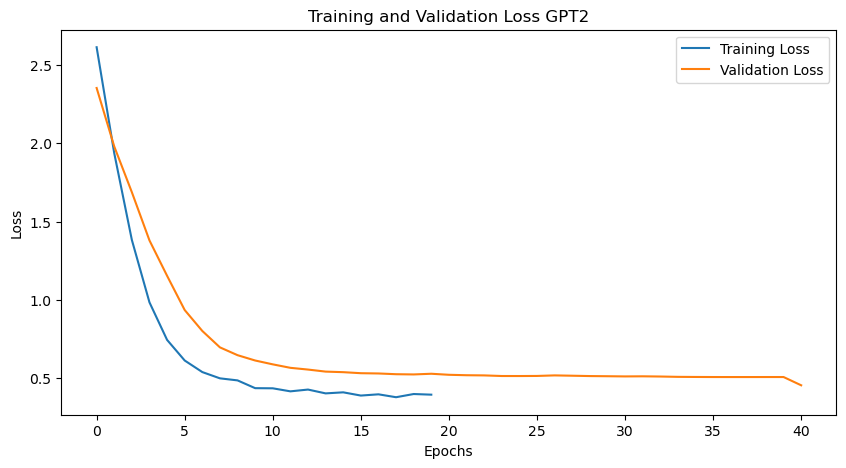

In [23]:
import matplotlib.pyplot as plt

train_loss = []
val_loss = []


for log in trainer.state.log_history:
    if 'loss' in log.keys():
        train_loss.append(log['loss'])
    if 'eval_loss' in log.keys():
        val_loss.append(log['eval_loss'])


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GPT2')
plt.legend()
plt.show()

In [24]:
test_results = trainer.evaluate(test_dataset)
test_loss = test_results['eval_loss']
print(f"Test Loss: {test_loss}") 

Test Loss: 0.45522305369377136


In [ ]:
predicted_outputs = trainer.predict(test_dataset)
predicted_ids = predicted_outputs.predictions.argmax(-1)  # Get the predicted token ids

# Decode the predicted and actual outputs back into text for comparison
predicted_texts = [tokenizer.decode(pred, skip_special_tokens=True) for pred in predicted_ids]
actual_texts = [tokenizer.decode(label, skip_special_tokens=True) for label in test_dataset['labels']]

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred_ids, true_ids):
    # Flatten the predicted and true label sequences
    flattened_pred = [token for pred in pred_ids for token in pred]
    flattened_true = [token for true in true_ids for token in true]
    
    # Compute accuracy
    accuracy = accuracy_score(flattened_true, flattened_pred)
    
    # Compute precision, recall, f1-score with zero_division parameter
    precision, recall, f1, _ = precision_recall_fscore_support(
        flattened_true, flattened_pred, average='macro', zero_division=0
    )
    
    return accuracy, precision, recall, f1

# Calculate metrics
accuracy, precision, recall, f1 = compute_metrics(predicted_ids.tolist(), test_dataset['labels'])

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.1098
Precision: 0.0035
Recall: 0.0040
F1-Score: 0.0037


In [27]:
for i in range(5):  # Adjust range as needed
    print(f"Sample {i + 1}")
    print(f"Actual Text: {actual_texts[i]}")
    print(f"Predicted Text: {predicted_texts[i]}")
    print("\n")

actual_lengths = [len(a) for a in actual_texts]
predicted_lengths = [len(p) for p in predicted_texts]

Sample 1
Actual Text: 
    Molecule 28:
    This molecule demonstrates a corrosion inhibition efficiency of 0.8391184959 percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments 
    The molecule exhibits a Kier flexibility value of 0.5572357810 suggesting 
    a relatively adaptable structure that could affect its ability to fit into complex molecular configurations

    The 3-path Kier alpha-modified shape index is measured at 0.6171432381 
    reflecting the structural modifications made to enhance its stability. Additionally it has a radial centric 
    value of 0.8549566519 which measures the centrality of its atomic distribution 
    often linked to molecule symmetry and its interactions in polar environments

    This molecule features a mean topological charge index of 0.7690237467 
    for the 7th order indicating how its charge is distributed over its surface potentially influencing its 
    electron-withdrawing or donating

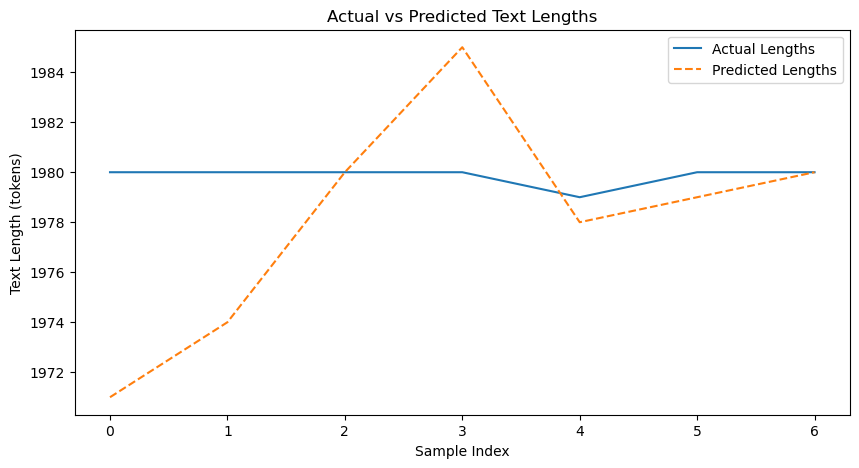

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(actual_lengths, label="Actual Lengths")
plt.plot(predicted_lengths, label="Predicted Lengths", linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Text Length (tokens)")
plt.legend()
plt.title("Actual vs Predicted Text Lengths")
plt.show()

In [97]:
import numpy as np

# Compare actual vs predicted numerical values
actual_numbers = [float(num) for num in actual_texts[0].split() if num.replace('.', '', 1).isdigit()]
predicted_numbers = [float(num) for num in predicted_texts[0].split() if num.replace('.', '', 1).isdigit()]

# Compute the absolute difference
differences = np.abs(np.array(actual_numbers) - np.array(predicted_numbers))
print("Differences between actual and predicted numerical values:", differences)

Differences between actual and predicted numerical values: [0.12854655 0.08718761 0.02222443 0.03803221 0.05322448 0.10394979
 0.         0.7071     0.18997986 0.09355779]
